# <center>Livrable Projet DATA SCIENCE</center>

!pip3 install opencv-python

## Livrable 1 - Prétraitement (denoising/sharpening…)

Le but est de traiter un ensemble de photographies afin de les rendre mieux traitables par les algorithmes de Machine Learning. Il y a deux traitements à réaliser : le débruitage, et l’affutage. Vous devrez produire un notebook Jupyter explicitant ces étapes de prétraitement, et leurs performances. Ces algorithmes s’appuieront sur des notions assez simples autour des filtres de convolution, et les appliqueront pour améliorer la qualité de l’image. Il faudra notamment décider d’un compromis entre dé-bruitage et affutage.

Le notebook devra intégrer :
<ul>
    <li>Le code de chargement du fichier.</li>
    <li>Le code du débruitage sur un sous-ensemble d’images bruitées. Le code doit être accompagné d’explications.</li>
    <li>Le code de l’affutage sur un sous-ensembles d’images floutées. Le code doit être accompagné d’explications.</li>
    <li>
        Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.
    </li>
</ul>

<b>Ce livrable est à fournir pour le 18/12/2020</b>

In [18]:
!pip3 install opencv-python

In [19]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import cv2

In [20]:
def get_image(path, filename, number, extension):
    return io.imread(path + filename + str(number).zfill(3) + extension)

def save_image(path, filename, number, extension, content):
    #Check if folder exists
    if not os.path.isdir(path):
        os.makedirs(path)
    imageio.imwrite(path + filename + str(number).zfill(3) + extension, content)
    
def get_file_amount(path):
    return len(os.listdir(path))

### Défloutage de l'image

Pour le défloutage des images, on utilise un filtre Laplacien. Ce filtre nous permet d'affuter les images grâce à une fonction de convolution de la librairie opencv sur l'image récupérée.

La variante de filtre choisie nous permet sur le jeu de données fourni d'affuter les images suffisemment pour retirer le flou présent sans pour autant y ajouter de bruit.

In [ ]:
# Deblurring function
def remove_blur(image):
    # Creation of a Laplacian kernel to use for debluring
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    # Convolution of the kernel with the image given in the function's parameter
    return cv2.filter2D(img, -1, kernel)

In [ ]:
# Get amount of file
file_number = get_file_amount("./Dataset/Blurry/")

fig, axs = plt.subplots(file_number//10, 10, figsize=(40,20))

In [21]:
def display_image(index_img, image):
    ax = axs[index_img//10, index_img%10]
    ax.axis('off')
    ax.set_title("Image n° "+ str(index_img))
    ax.imshow(image)

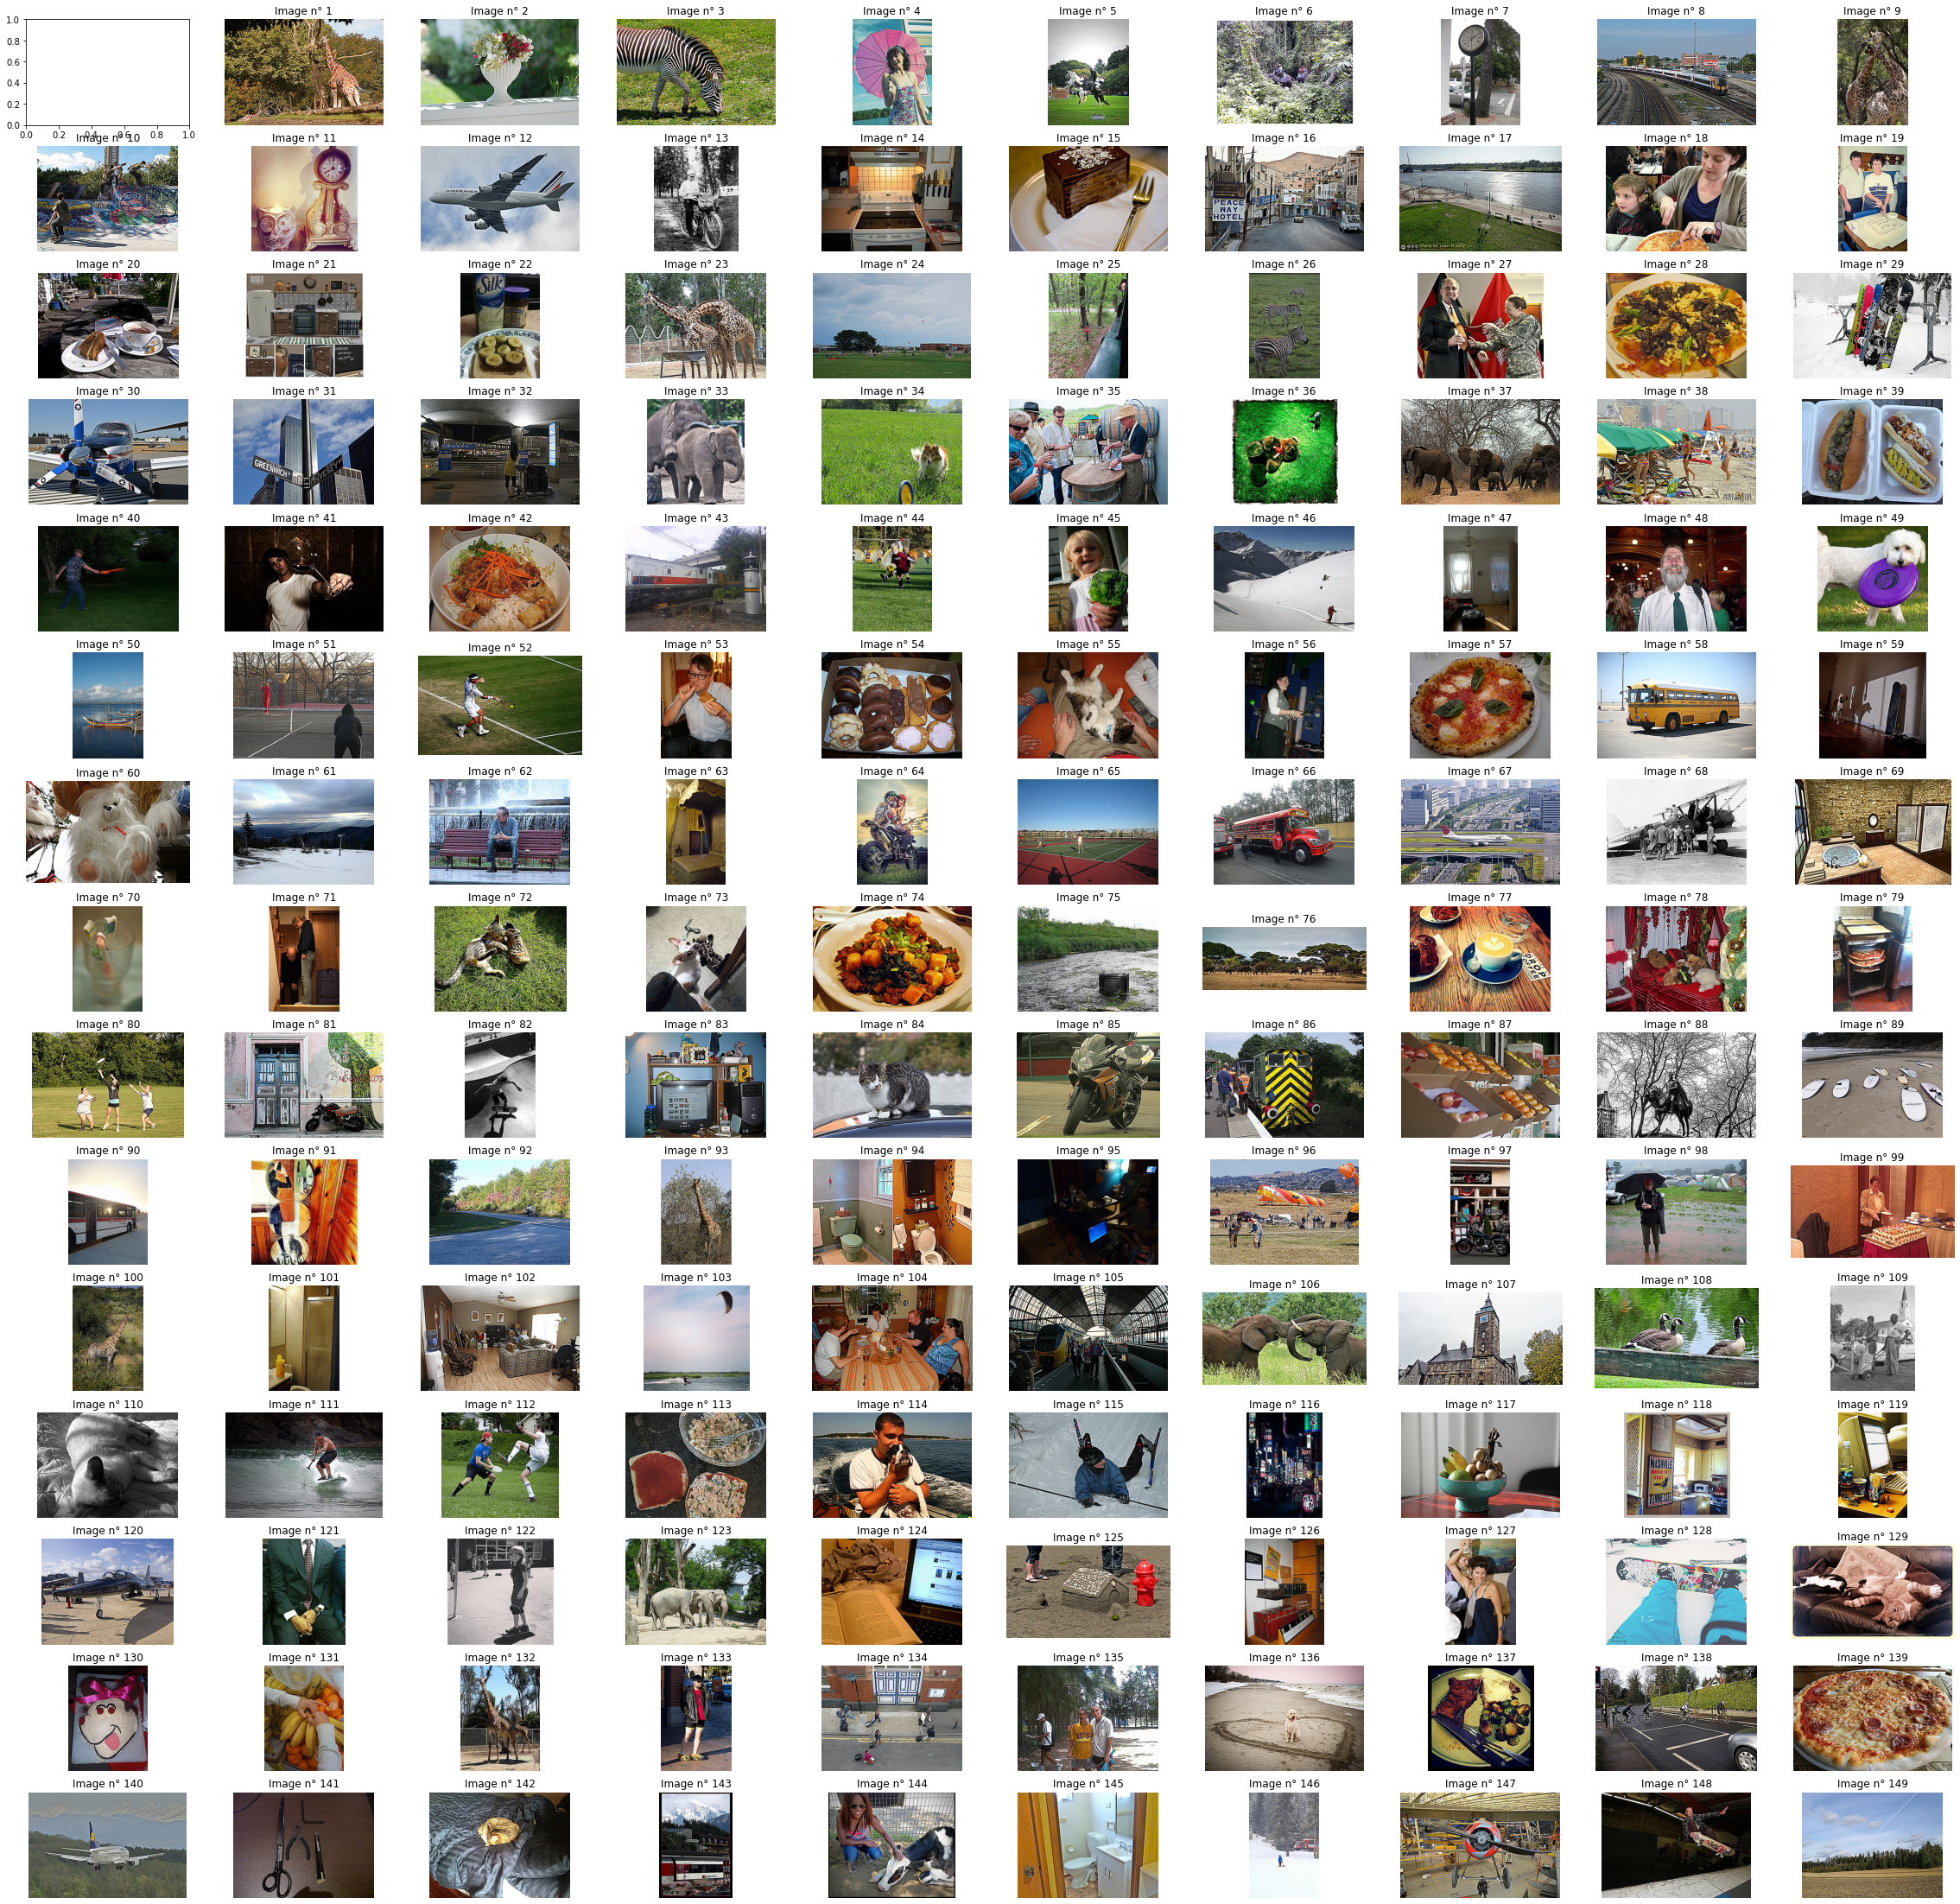

In [22]:
def remove_blur(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

# Get amount of file
file_number = get_file_amount("./Dataset/Blurry/")

fig, axs = plt.subplots(file_number//10, 10, figsize=(40,40))

# Looping on the different images in order to process them
for i in range(1, file_number):
    # Open single picture
    img = get_image("./Dataset/Blurry/", "blurry_", i, ".jpg")

    # Remove blur from the colored image image
    deblurred_img = remove_blur(img)

    # Image diplay
    display_image(i, deblurred_img)
    
    # Saving Image
    save_image("./Dataset/processed/deblurred/", "deblurred_", i, ".jpg", deblurred_img)

# Display the images
plt.show()

In [ ]:
# Convert RGB image to grey image
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image,None,10,10,7,15)

# Get amount of file
file_number = get_file_amount("./Dataset/Noisy/")

fig, axs = plt.subplots(file_number//10, 10, figsize=(40,40))

for i in range(1, file_number):
    # Open single picture
    img = get_image("./Dataset/Noisy/", "noisy_", i, ".jpg")

    # Remove blur from grey image
    denoised_img = remove_noise(img)

    # Image diplay
    display_image(i, denoised_img)
    
    # Saving Image
    save_image("./Dataset/processed/denoised/", "denoised_", i, ".jpg", denoised_img)
    
# Display the images
plt.show()